<a href="https://colab.research.google.com/github/plscabral/MVP4-PUC-RIO/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados necessários.

In [148]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carregando os dados do dataset escolhido.

In [149]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/plscabralMVP4-PUC-RIO/main/dataset/Cardiovascular_Disease_Dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Remove as linhas com valores NaN
dataset = dataset.dropna()

# Mostra as primeiras linhas do dataset
dataset.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## Separação em conjunto de treino e conjunto de teste com holdout.

In [150]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:12]
y = array[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência.

### Criação e avaliação de modelos: linha base.

KNN: 0.805079 (0.046022)
CART: 0.963528 (0.018263)
NB: 0.952215 (0.016796)
SVM: 0.800206 (0.029111)


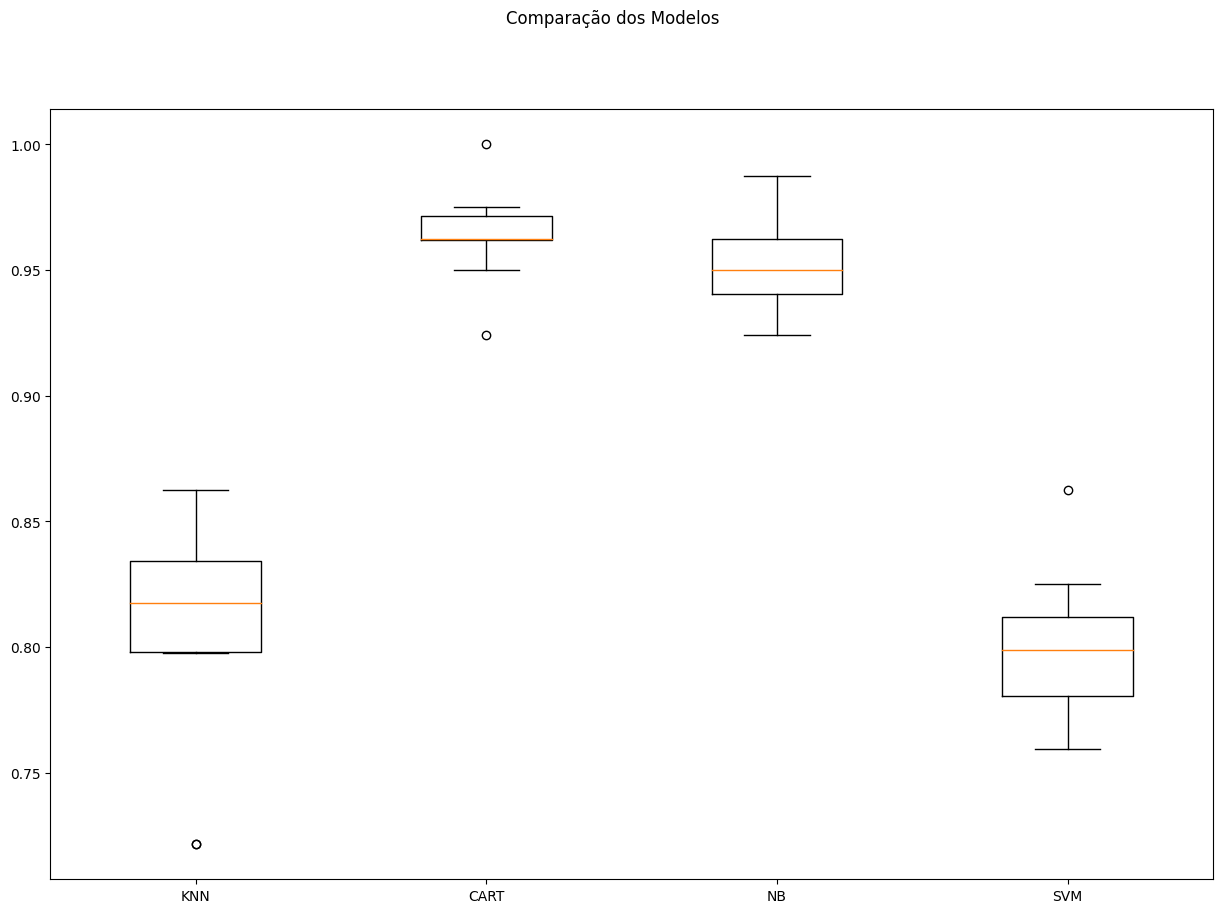

In [151]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados.

KNN-orig: 0.805 (0.046)
CART-orig: 0.964 (0.018)
NB-orig: 0.952 (0.017)
SVM-orig: 0.800 (0.029)
KNN-padr: 0.938 (0.026)
CART-padr: 0.965 (0.022)
NB-padr: 0.952 (0.017)
SVM-padr: 0.970 (0.016)
KNN-norm: 0.937 (0.024)
CART-norm: 0.962 (0.021)
NB-norm: 0.952 (0.017)
SVM-norm: 0.966 (0.019)


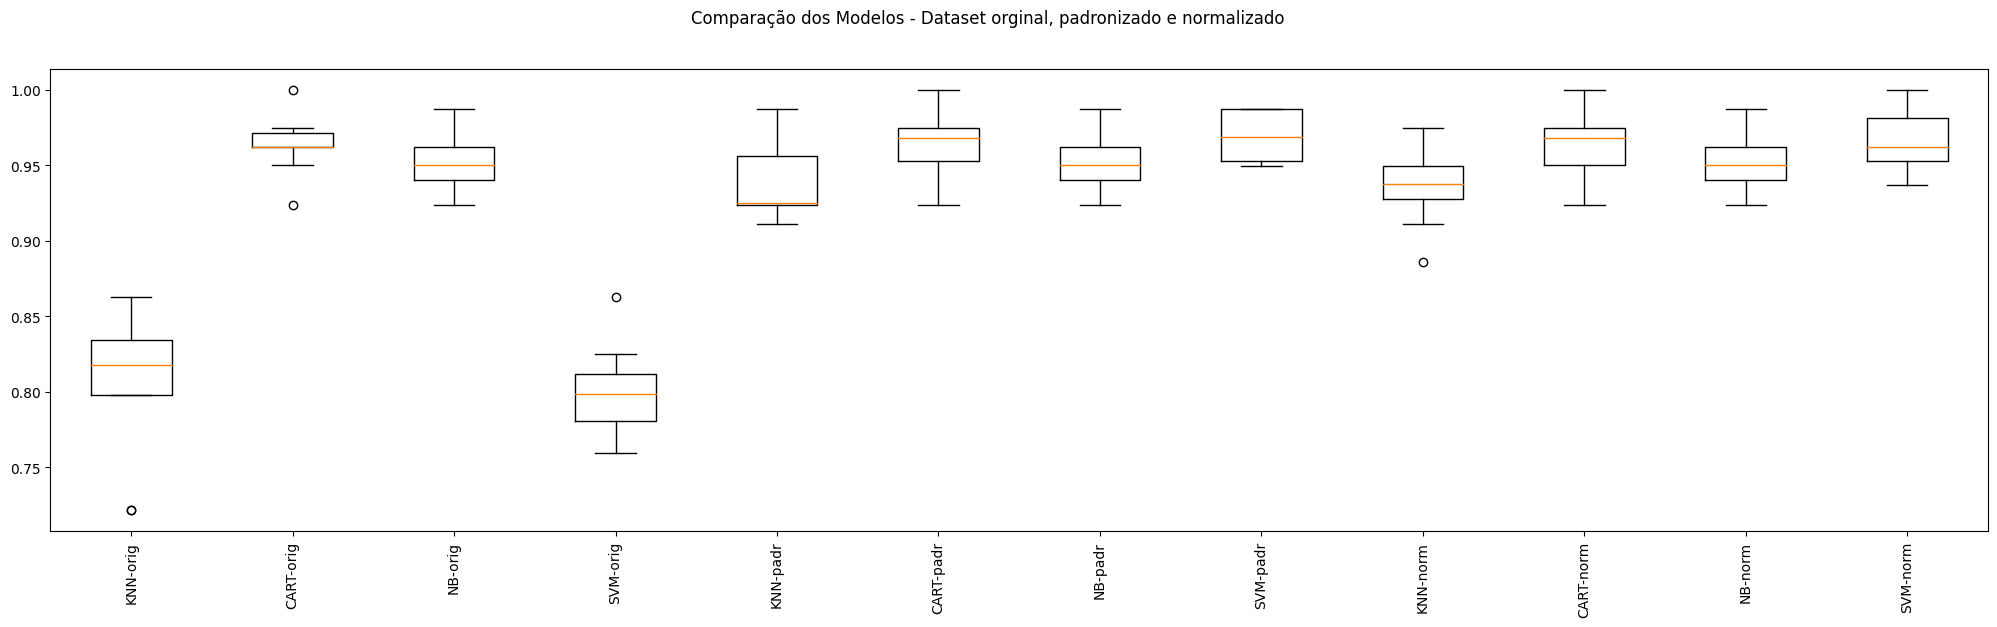

In [152]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros.

In [153]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.850332 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.959699 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.958481 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}


## Finalização do Modelo.

In [157]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.965


In [158]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## Simulando a aplicação do modelo em dados não vistos.

In [159]:
data = {
    'age': [25, 45, 69, 47],
    'gender': [1, 1, 1, 1],
    'chestpain': [0, 1, 0, 3],
    'restingBP': [158, 186, 156, 143],
    'serumcholestrol': [270, 417, 434, 258],
    'fastingbloodsugar': [0, 0, 1, 1],
    'restingrelectro': [0, 1, 0, 1],
    'maxheartrate': [143, 117, 196, 98],
    'exerciseangia': [1, 1, 0, 1],
    'oldpeak': [4.7, 5.9, 1.4, 5.7],
    'slope': [0, 3, 3, 1],
    'noofmajorvessels': [0, 2, 1, 0]
}

atributos = [
    'age',
    'gender',
    'chestpain',
    'restingBP',
    'serumcholestrol',
    'fastingbloodsugar',
    'restingrelectro',
    'maxheartrate',
    'exerciseangia',
    'oldpeak',
    'slope',
    'noofmajorvessels',
]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:12].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.35768528  0.55570154 -1.02994393  0.20971943 -0.31173538 -0.64715023
  -0.97212911 -0.07333377  1.00604235  1.16497709 -1.53648023 -1.25247049]
 [-0.23808391  0.55570154  0.02110541  1.14341286  0.79747528 -0.64715023
   0.32578053 -0.83447656  1.00604235  1.86424418  1.45830315  0.79422452]
 [ 1.10543774  0.55570154 -1.02994393  0.14302705  0.92575134  1.54523626
  -0.97212911  1.47822653 -0.99399394 -0.75800739  1.45830315 -0.22912299]
 [-0.12612377  0.55570154  2.12320409 -0.29047347 -0.40228319  1.54523626
   0.32578053 -1.39069628  1.00604235  1.74769966 -0.5382191  -1.25247049]]


In [160]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 1. 0.]


# Salvando o modelo escolhido.

In [161]:
import pickle

# Salvar o modelo usando pickle
with open('cardiovascular_knn.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Salvando scaler.

In [162]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {
    'age': [77, 25, 62, 24],
    'gender': [0, 0, 1, 1],
    'chestpain': [0, 1, 1, 0],
    'restingBP': [183, 197, 125, 170],
    'serumcholestrol': [298, 0, 342, 354],
    'fastingbloodsugar': [1, 0, 0, 0],
    'restingrelectro': [2, 0, 0, 0],
    'maxheartrate': [142, 195, 128, 90],
    'exerciseangia': [1, 0, 1, 1],
    'oldpeak': [2.4, 1, 2.1, 1.5],
    'slope': [3, 0, 0, 0],
    'noofmajorvessels': [3, 1, 0, 0]
}

atributos = [
    'age',
    'gender',
    'chestpain',
    'restingBP',
    'serumcholestrol',
    'fastingbloodsugar',
    'restingrelectro',
    'maxheartrate',
    'exerciseangia',
    'oldpeak',
    'slope',
    'noofmajorvessels',
]
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
newX_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(newX_train)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Realizando modelo de regressão logística.

In [163]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [164]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [165]:
# Salva o modelo no disco
filename = 'cardiovascular_lr.pkl'
dump(modelo, open(filename, 'wb'))

# Verificando score do modelo de regressão logística.

In [166]:
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.94
